# Data exploration, cleaning and processing.


In [1]:
#Load in the neccesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",237)


In [2]:
#load in the data frame 
df=pd.read_csv("../../Data/csv_hil/psam_h17.csv")


C:\Users\jstep\anaconda3\envs\Capstone\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Look at the data frame to see the over all dtypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293832 entries, 0 to 293831
Columns: 237 entries, RT to WGTP80
dtypes: float64(145), int64(90), object(2)
memory usage: 531.3+ MB


In [4]:
#check outwhat kinda of data type I am working with. 
df.dtypes

RT              object
SERIALNO        object
DIVISION         int64
PUMA             int64
REGION           int64
ST               int64
ADJHSG           int64
ADJINC           int64
WGTP             int64
NP               int64
TYPE             int64
ACCESS         float64
ACR            float64
AGS            float64
BATH           float64
BDSP           float64
BLD            float64
BUS            float64
BROADBND       float64
COMPOTHX       float64
CONP           float64
DIALUP         float64
ELEFP          float64
ELEP           float64
FS             float64
FULFP          float64
FULP           float64
GASFP          float64
GASP           float64
HFL            float64
HISPEED        float64
HOTWAT         float64
INSP           float64
LAPTOP         float64
MHP            float64
MRGI           float64
MRGP           float64
MRGT           float64
MRGX           float64
OTHSVCEX       float64
REFR           float64
RMSP           float64
RNTM           float64
RNTP       

In [5]:
#To see which columns have null values
df.isna().sum()

RT                  0
SERIALNO            0
DIVISION            0
PUMA                0
REGION              0
ST                  0
ADJHSG              0
ADJINC              0
WGTP                0
NP                  0
TYPE                0
ACCESS          44144
ACR             95771
AGS            263643
BATH            26958
BDSP            26958
BLD             26958
BUS             95771
BROADBND        90049
COMPOTHX        44144
CONP           112281
DIALUP          90049
ELEFP           44144
ELEP            53154
FS              17186
FULFP           44144
FULP           286763
GASFP           44144
GASP           115233
HFL             44144
HISPEED         90049
HOTWAT          26958
INSP           112281
LAPTOP          44144
MHP            288050
MRGI           184717
MRGP           184717
MRGT           184717
MRGX           112281
OTHSVCEX        90049
REFR            26958
RMSP            26958
RNTM           225782
RNTP           225782
RWAT            26958
RWATPR    

### Now that we know our null values we can filter them or or impute them.

In [6]:
#Going to drop the nan values from the target column due to not wanting to impute them. 
#I think 246k values is enough for now until a good imputing method is avalible.
no_target_nans=df["HINCP"].dropna()

In [7]:
no_target_nans

0          47900.0
1          36100.0
2         100000.0
3          45000.0
6          88000.0
            ...   
293826     30000.0
293828    150000.0
293829     85000.0
293830    117500.0
293831     89000.0
Name: HINCP, Length: 249688, dtype: float64

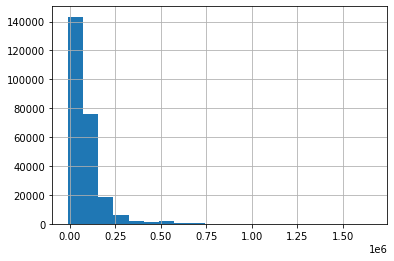

In [8]:
no_target_nans.hist(bins=20)

In [9]:
# filtering out the zero values and the nan values from the target column to help with running models.
non_nans_and_non_zero= no_target_nans[no_target_nans!=0]

In [10]:
non_nans_and_non_zero

0          47900.0
1          36100.0
2         100000.0
3          45000.0
6          88000.0
            ...   
293826     30000.0
293828    150000.0
293829     85000.0
293830    117500.0
293831     89000.0
Name: HINCP, Length: 246502, dtype: float64

In [11]:
### base_df_1 has non nans and no zero values
base_df_1=df.merge(non_nans_and_non_zero,how="inner",right_index=True,left_index=True)

In [12]:
base_df_1

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACCESS,ACR,AGS,BATH,BDSP,BLD,BUS,BROADBND,COMPOTHX,CONP,DIALUP,ELEFP,ELEP,FS,FULFP,FULP,GASFP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,TOIL,VACS,VALP,VEH,WATFP,WATP,YBL,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHT,HINCP_x,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXAMT,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FBUSP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FTOILP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80,HINCP_y
0,H,2014000000015,3,3108,2,17,1061728,1070673,13,4,1,1.0,1.0,NaN,1.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,3.0,150.0,1.0,2.0,NaN,4.0,30.0,1.0,1.0,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,6.0,2.0,1000.0,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,3.0,1.0,NaN,NaN,3.0,3.0,1300.0,5.0,1.0,47900.0,2.0,1288.0,32.0,1.0,1.0,47900.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,4.0,0.0,0.0,2.0,NaN,0.0,1.0,9.0,0.0,1.0,0.0,0.0,3.0,NaN,NaN,1.0,0.0,0.0,NaN,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,13,4,22,13,24,13,4,12,4,20,14,4,4,12,13,14,15,15,27,20,12,4,21,13,19,14,3,14,4,23,13,4,5,13,13,13,11,15,4,4,14,22,3,12,3,11,19,15,22,4,15,24,23,14,13,11,12,14,4,4,12,22,4,12,5,15,24,12,19,4,15,25,24,15,13,11,15,14,24,47900.0
1,H,2014000000029,3,2501,2,17,1061728,1070673,3,2,1,1.0,1.0,NaN,1.0,3.0,2.0,2.0,2.0,2.0,0.0,2.0,3.0,50.0,2.0,2.0,NaN,4.0,150.0,1.0,1.0,9.0,600.0,1.0,NaN,2.0,330.0,2.0,1.0,2.0,1.0,6.0,NaN,NaN,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,35000.0,3.0,3.0,800.0,1.0,4.0,36100.0,4.0,NaN,NaN,1.0,1.0,36100.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,23.0,0.0,1.0,9.0,0.0,0.0,2.0,0.0,1.0,691.0,3.0,0.0,0.0,1.0,525.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,3,4,5,6,5,3,4,7,5,3,7,8,6,5,3,7,3,1,1,3,4,5,4,1,1,4,4,1,4,4,1,1,1,1,3,1,3,1,0,4,3,4,3,1,1,4,5,1,3,4,1,1,1,1,4,1,3,5,7,4,3,4,4,8,8,3,3,6,4,4,7,8,7,8,4,6,4,7,36100.0
2,H,2014000000041,3,3502,2,17,1061728,1070673,31,1,1,1.0,NaN,NaN,1.0,0.0,9.0,NaN,2.0,2.0,NaN,2.0,3.0,30.0,2.0,2.0,NaN,1.0,NaN,3.0,1.0,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1000.0,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,3.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1030.0,12.0,1.0,6.0,100000.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1.0,9.0,0.0,0.0,0.0,0.0,3.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,30,31,8,32,32,50,9,48,56,30,25,9,8,51,30,29,33,52,8,31,36,41,10,27,30,55,8,51,56,32,35,10,9,43,27,36,30,48,54,29,32,37,5

In [13]:
#base_df_2 has no nans but has zeros I want to experiment with both because the zeros could be valuable._2
base_df_2=df.merge(no_target_nans,how="inner",right_index=True,left_index=True)

In [14]:
base_df_2

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACCESS,ACR,AGS,BATH,BDSP,BLD,BUS,BROADBND,COMPOTHX,CONP,DIALUP,ELEFP,ELEP,FS,FULFP,FULP,GASFP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,TOIL,VACS,VALP,VEH,WATFP,WATP,YBL,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHT,HINCP_x,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXAMT,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FBUSP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FTOILP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80,HINCP_y
0,H,2014000000015,3,3108,2,17,1061728,1070673,13,4,1,1.0,1.0,NaN,1.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,3.0,150.0,1.0,2.0,NaN,4.0,30.0,1.0,1.0,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,6.0,2.0,1000.0,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,3.0,1.0,NaN,NaN,3.0,3.0,1300.0,5.0,1.0,47900.0,2.0,1288.0,32.0,1.0,1.0,47900.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,4.0,0.0,0.0,2.0,NaN,0.0,1.0,9.0,0.0,1.0,0.0,0.0,3.0,NaN,NaN,1.0,0.0,0.0,NaN,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,13,4,22,13,24,13,4,12,4,20,14,4,4,12,13,14,15,15,27,20,12,4,21,13,19,14,3,14,4,23,13,4,5,13,13,13,11,15,4,4,14,22,3,12,3,11,19,15,22,4,15,24,23,14,13,11,12,14,4,4,12,22,4,12,5,15,24,12,19,4,15,25,24,15,13,11,15,14,24,47900.0
1,H,2014000000029,3,2501,2,17,1061728,1070673,3,2,1,1.0,1.0,NaN,1.0,3.0,2.0,2.0,2.0,2.0,0.0,2.0,3.0,50.0,2.0,2.0,NaN,4.0,150.0,1.0,1.0,9.0,600.0,1.0,NaN,2.0,330.0,2.0,1.0,2.0,1.0,6.0,NaN,NaN,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,35000.0,3.0,3.0,800.0,1.0,4.0,36100.0,4.0,NaN,NaN,1.0,1.0,36100.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,23.0,0.0,1.0,9.0,0.0,0.0,2.0,0.0,1.0,691.0,3.0,0.0,0.0,1.0,525.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,3,4,5,6,5,3,4,7,5,3,7,8,6,5,3,7,3,1,1,3,4,5,4,1,1,4,4,1,4,4,1,1,1,1,3,1,3,1,0,4,3,4,3,1,1,4,5,1,3,4,1,1,1,1,4,1,3,5,7,4,3,4,4,8,8,3,3,6,4,4,7,8,7,8,4,6,4,7,36100.0
2,H,2014000000041,3,3502,2,17,1061728,1070673,31,1,1,1.0,NaN,NaN,1.0,0.0,9.0,NaN,2.0,2.0,NaN,2.0,3.0,30.0,2.0,2.0,NaN,1.0,NaN,3.0,1.0,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1000.0,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,3.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1030.0,12.0,1.0,6.0,100000.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1.0,9.0,0.0,0.0,0.0,0.0,3.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,30,31,8,32,32,50,9,48,56,30,25,9,8,51,30,29,33,52,8,31,36,41,10,27,30,55,8,51,56,32,35,10,9,43,27,36,30,48,54,29,32,37,5

Lost about 3k rows, but we can impute those once we find a way to go about that.
 Now time to see what coeffcients look the best with our target.

In [15]:
pd.set_option("display.max_rows",237)

In [16]:
corr=base_df_1.corrwith(non_nans_and_non_zero)

In [17]:
corr

DIVISION            NaN
PUMA           0.157883
REGION              NaN
ST                  NaN
ADJHSG        -0.043045
ADJINC        -0.044081
WGTP          -0.010085
NP             0.242765
TYPE                NaN
ACCESS        -0.228845
ACR            0.010921
AGS           -0.016938
BATH          -0.010073
BDSP           0.331825
BLD           -0.118682
BUS            0.034486
BROADBND      -0.122133
COMPOTHX      -0.033205
CONP           0.055495
DIALUP         0.030391
ELEFP          0.073859
ELEP           0.159176
FS             0.197262
FULFP          0.013941
FULP          -0.076408
GASFP          0.131723
GASP           0.075057
HFL           -0.081889
HISPEED       -0.115078
HOTWAT              NaN
INSP           0.320073
LAPTOP        -0.249283
MHP           -0.004578
MRGI           0.081537
MRGP           0.519832
MRGT           0.063699
MRGX          -0.162247
OTHSVCEX       0.023871
REFR          -0.012676
RMSP           0.364845
RNTM           0.031225
RNTP           0

In [18]:
#Store these values of intest with their pearson coefficent in this celll due to there positive correlation with the target value.
# PUMA           0.157883
# NP             0.242765
# ACR            0.010921
# BDSP           0.331825
# BUS            0.034486
# CONP           0.055495
# FS             0.197262
# INSP           0.320073
# MRGP           0.519832
# MRGI           0.081537
# RMSP           0.364845
# RNTP           0.491500
# SMP            0.190873
# TOIL           0.037039
# VALP           0.489298
# VEH            0.295509
# YBL            0.154950
# TAXAMT         0.515957
# SVAL           0.208105
# SMOCP          0.527849
# WIF            0.265965

In [19]:
#creating a Dataframe with all the features of interest to allow for easier data manipulation.
df1_with_with_features=base_df_1.loc[:,["HINCP_x","PUMA","NP","ACR","BDSP","BUS","CONP","FS","INSP","MRGP","MRGI","RMSP",
                                        "RNTP","SMP","TOIL","VALP","VEH","YBL","TAXAMT","SVAL","SMOCP","WIF"]]

In [20]:
df1_with_with_features

,HINCP_x,PUMA,NP,ACR,BDSP,BUS,CONP,FS,INSP,MRGP,MRGI,RMSP,RNTP,SMP,TOIL,VALP,VEH,YBL,TAXAMT,SVAL,SMOCP,WIF
0,47900.0,3108,4,1.0,3.0,2.0,NaN,1.0,NaN,NaN,NaN,6.0,1000.0,NaN,1.0,NaN,3.0,5.0,NaN,0.0,NaN,2.0
1,36100.0,2501,2,1.0,3.0,2.0,0.0,2.0,600.0,330.0,2.0,6.0,NaN,NaN,1.0,35000.0,3.0,1.0,525.0,1.0,691.0,0.0
2,100000.0,3502,1,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1000.0,NaN,1.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN
3,45000.0,3526,2,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,5.0,750.0,NaN,1.0,NaN,1.0,6.0,NaN,0.0,NaN,NaN
6,88000.0,1204,3,1.0,2.0,2.0,0.0,2.0,20.0,420.0,1.0,4.0,NaN,NaN,1.0,140.0,2.0,1.0,525.0,1.0,603.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293826,30000.0,3208,1,1.0,4.0,9.0,0.0,2.0,0.0,670.0,2.0,11.0,NaN,NaN,9.0,150000.0,2.0,4.0,6500.0,1.0,1366.0,NaN
293828,150000.0,3208,4,1.0,4.0,9.0,0.0,2.0,1200.0,2200.0,1.0,8.0,NaN,NaN,9.0,275000.0,2.0,7.0,10500.0,1.0,2603.0,1.0
293829,85000.0,2601,2,1.0,3.0,9.0,0.0,2.0,550.0,NaN,NaN,6.0,NaN,NaN,9.0,145000.0,2.0,3.0,5750.0,1.0,751.0,1.0
293830,117500.0,3407,2,1.0,4.0,9.0,0.0,2.0,990.0,NaN,NaN,10.0,NaN,NaN,9.0,500000.0,2.0,3.0,11500.0,1.0,1168.0,1.0


It is fairly evident that we have a lot of missing value in the data frame we will need to impute some of these values. 

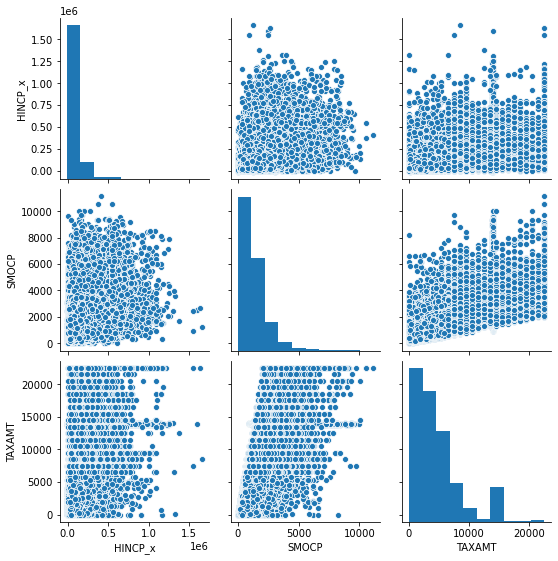

In [21]:
#Taking a look at the features with the highest pearson correlation to see what the correlation look like visually
sns.pairplot(df1_with_with_features,vars=["HINCP_x","SMOCP","TAXAMT"]);

In [22]:
df1_with_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246502 entries, 0 to 293831
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   HINCP_x  246502 non-null  float64
 1   PUMA     246502 non-null  int64  
 2   NP       246502 non-null  int64  
 3   ACR      186437 non-null  float64
 4   BDSP     246502 non-null  float64
 5   BUS      186437 non-null  float64
 6   CONP     180320 non-null  float64
 7   FS       246502 non-null  float64
 8   INSP     180320 non-null  float64
 9   MRGP     108705 non-null  float64
 10  MRGI     108705 non-null  float64
 11  RMSP     246502 non-null  float64
 12  RNTP     62571 non-null   float64
 13  SMP      16365 non-null   float64
 14  TOIL     246502 non-null  float64
 15  VALP     180320 non-null  float64
 16  VEH      246502 non-null  float64
 17  YBL      246502 non-null  float64
 18  TAXAMT   180320 non-null  float64
 19  SVAL     246502 non-null  float64
 20  SMOCP    180320 non-null  

In [23]:
df1_with_with_features.isna().sum()

HINCP_x         0
PUMA            0
NP              0
ACR         60065
BDSP            0
BUS         60065
CONP        66182
FS              0
INSP        66182
MRGP       137797
MRGI       137797
RMSP            0
RNTP       183931
SMP        230137
TOIL            0
VALP        66182
VEH             0
YBL             0
TAXAMT      66182
SVAL            0
SMOCP       66182
WIF         83688
dtype: int64

In [24]:
#going to takle the numerical features first.
df1_numeric=df1_with_with_features[["HINCP_x","SMOCP","PUMA","NP","BDSP","CONP","INSP","MRGP","RMSP","RNTP","SMP","VALP","TAXAMT"]]

In [25]:
df1_numeric

,HINCP_x,SMOCP,PUMA,NP,BDSP,CONP,INSP,MRGP,RMSP,RNTP,SMP,VALP,TAXAMT
0,47900.0,NaN,3108,4,3.0,NaN,NaN,NaN,6.0,1000.0,NaN,NaN,NaN
1,36100.0,691.0,2501,2,3.0,0.0,600.0,330.0,6.0,NaN,NaN,35000.0,525.0
2,100000.0,NaN,3502,1,0.0,NaN,NaN,NaN,1.0,1000.0,NaN,NaN,NaN
3,45000.0,NaN,3526,2,2.0,NaN,NaN,NaN,5.0,750.0,NaN,NaN,NaN
6,88000.0,603.0,1204,3,2.0,0.0,20.0,420.0,4.0,NaN,NaN,140.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293826,30000.0,1366.0,3208,1,4.0,0.0,0.0,670.0,11.0,NaN,NaN,150000.0,6500.0
293828,150000.0,2603.0,3208,4,4.0,0.0,1200.0,2200.0,8.0,NaN,NaN,275000.0,10500.0
293829,85000.0,751.0,2601,2,3.0,0.0,550.0,NaN,6.0,NaN,NaN,145000.0,5750.0
293830,117500.0,1168.0,3407,2,4.0,0.0,990.0,NaN,10.0,NaN,NaN,500000.0,11500.0


In [26]:
df1_numeric.isna().sum()

HINCP_x         0
SMOCP       66182
PUMA            0
NP              0
BDSP            0
CONP        66182
INSP        66182
MRGP       137797
RMSP            0
RNTP       183931
SMP        230137
VALP        66182
TAXAMT      66182
dtype: int64

In [27]:
#decided to drop the SMP column due to it have far to many values to impute 90% of that column would be imputed data.
# RNTP has a similar issue with 183k values being null. So I will drop this one as well.
df1_numeric_dropepd_columns=df1_with_with_features[["HINCP_x","SMOCP","PUMA","NP","BDSP","CONP","INSP","MRGP","RMSP","VALP","TAXAMT"]]

In [28]:
df1_numeric_dropepd_columns

,HINCP_x,SMOCP,PUMA,NP,BDSP,CONP,INSP,MRGP,RMSP,VALP,TAXAMT
0,47900.0,NaN,3108,4,3.0,NaN,NaN,NaN,6.0,NaN,NaN
1,36100.0,691.0,2501,2,3.0,0.0,600.0,330.0,6.0,35000.0,525.0
2,100000.0,NaN,3502,1,0.0,NaN,NaN,NaN,1.0,NaN,NaN
3,45000.0,NaN,3526,2,2.0,NaN,NaN,NaN,5.0,NaN,NaN
6,88000.0,603.0,1204,3,2.0,0.0,20.0,420.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...
293826,30000.0,1366.0,3208,1,4.0,0.0,0.0,670.0,11.0,150000.0,6500.0
293828,150000.0,2603.0,3208,4,4.0,0.0,1200.0,2200.0,8.0,275000.0,10500.0
293829,85000.0,751.0,2601,2,3.0,0.0,550.0,NaN,6.0,145000.0,5750.0
293830,117500.0,1168.0,3407,2,4.0,0.0,990.0,NaN,10.0,500000.0,11500.0


In [29]:
# This was used to evalued the amount of zeros in a column if any.
df1_numeric_dropepd_columns.TAXAMT.value_counts()

6500.0     12929
5250.0      9281
7500.0      8196
8500.0      6698
13900.0     6281
4050.0      5989
3050.0      5476
5750.0      5396
2050.0      4884
0.0         4454
9500.0      4415
1250.0      4168
2550.0      3704
3550.0      3446
1550.0      3371
1850.0      3301
13800.0     3286
4550.0      3122
14000.0     3060
2450.0      2915
1450.0      2700
1650.0      2692
1050.0      2662
1350.0      2457
2250.0      2456
3250.0      2336
2850.0      2247
3650.0      2213
3850.0      2155
1750.0      2103
2650.0      2055
1950.0      1952
2350.0      1887
825.0       1826
4250.0      1796
4850.0      1687
1150.0      1663
625.0       1619
2150.0      1614
3450.0      1563
2750.0      1498
925.0       1475
75.0        1432
525.0       1426
725.0       1292
425.0       1275
3350.0      1241
3750.0      1221
4650.0      1153
2950.0      1143
325.0       1137
125.0       1057
4450.0      1055
4350.0      1040
3950.0      1026
225.0       1013
3150.0       982
25.0         948
375.0        8

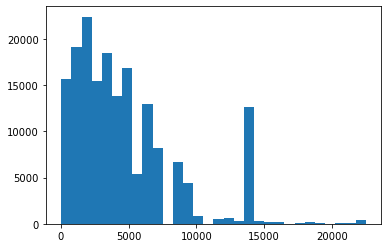

In [30]:
# Utilized this to see how the data was distributed.
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.TAXAMT>0].TAXAMT,bins=30);

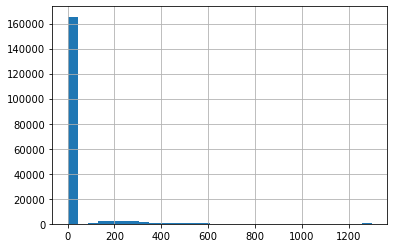

In [31]:
# I can see from the dataframe that this columns has many zeros and nan values so no need to run a values counts on this.
df1_numeric_dropepd_columns.CONP.hist(bins=30)

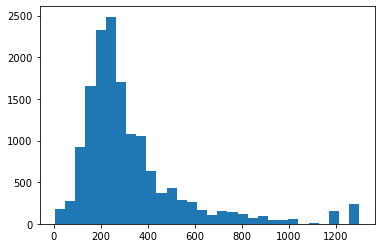

In [32]:
# Same process to see the distribution of the data now knowing there is are zero values
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.CONP>0].CONP,bins=30);

In [33]:
# This was used to evalued the amount of zeros in a column if any.
df1_numeric_dropepd_columns.VALP.value_counts()

150000.0     8218
200000.0     8061
250000.0     6833
100000.0     6629
300000.0     6047
             ... 
693000.0        1
43300.0         1
477000.0        1
15200.0         1
1298000.0       1
Name: VALP, Length: 1116, dtype: int64

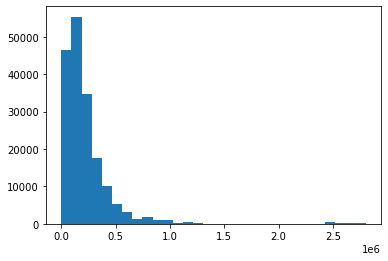

In [34]:
# Now that I know there are zero values I can drop them and look at how the data is distributed 
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.VALP>0].VALP,bins=30);

In [35]:
# This was used to evalued the amount of zeros in a column if any.
df1_numeric_dropepd_columns.RMSP.value_counts()

5.0     47499
6.0     47142
7.0     33855
4.0     32512
8.0     25962
9.0     15189
3.0     15185
10.0     9892
2.0      4573
11.0     4537
1.0      3384
12.0     3096
16.0     1370
13.0     1305
19.0      445
17.0      337
14.0      219
Name: RMSP, dtype: int64

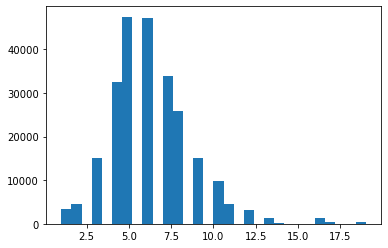

In [36]:
# Now that I know there are zero values I can drop them and look at how the data is distributed 
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.RMSP>0].RMSP,bins=30);

In [37]:
# This was used to evalued the amount of zeros in a column if any.
df1_numeric_dropepd_columns.MRGP.value_counts()

1200.0    5906
1100.0    5174
1300.0    4785
1500.0    4332
1000.0    4076
1400.0    4062
1600.0    3323
1800.0    2948
1700.0    2844
2000.0    2636
500.0     2277
600.0     2115
1900.0    2106
800.0     2046
700.0     1817
900.0     1797
400.0     1564
2100.0    1559
2200.0    1535
300.0     1313
2500.0    1282
2300.0    1224
750.0     1136
650.0     1131
2400.0    1065
450.0     1019
850.0      990
550.0      984
350.0      975
3000.0     902
2600.0     769
200.0      768
950.0      765
250.0      694
2800.0     690
5100.0     653
2700.0     644
560.0      629
680.0      625
530.0      619
480.0      613
780.0      603
580.0      601
630.0      596
430.0      587
540.0      578
640.0      558
4900.0     557
730.0      550
620.0      547
670.0      545
980.0      532
740.0      529
860.0      517
380.0      513
720.0      509
470.0      509
570.0      500
590.0      494
420.0      490
330.0      482
440.0      480
820.0      474
830.0      472
460.0      472
880.0      471
660.0     

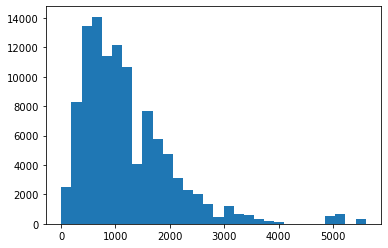

In [38]:
# Now that I know there are zero values I can drop them and look at how the data is distributed 
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.MRGP>0].MRGP,bins=30);

In [39]:
# This was used to evalued the amount of zeros in a column if any.
df1_numeric_dropepd_columns.INSP.value_counts()

0.0       18629
1200.0    14827
1000.0    13648
800.0      9408
600.0      8617
1100.0     6781
900.0      6544
700.0      6398
500.0      6387
1500.0     5656
1300.0     4688
1400.0     3979
2000.0     3736
400.0      3193
300.0      2880
750.0      2464
1600.0     2387
650.0      2286
1800.0     2285
850.0      2001
200.0      1923
1700.0     1509
450.0      1310
550.0      1294
950.0      1277
250.0      1260
350.0      1176
2500.0     1139
3000.0     1132
100.0      1010
720.0       984
680.0       959
780.0       928
2400.0      881
1900.0      806
150.0       804
840.0       784
960.0       781
5600.0      731
980.0       722
2200.0      707
880.0       676
760.0       621
860.0       603
480.0       581
580.0       577
660.0       576
740.0       568
730.0       567
890.0       551
790.0       550
2100.0      549
670.0       549
830.0       549
640.0       548
560.0       534
630.0       529
770.0       526
4.0         520
820.0       506
690.0       501
120.0       478
50.0    

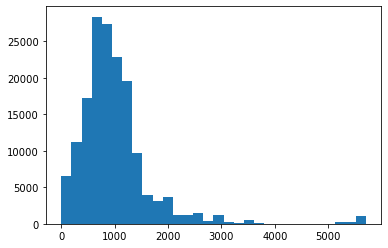

In [40]:
# Now that I know there are zero values I can drop them and look at how the data is distributed
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.INSP>0].INSP,bins=30);

In [41]:
df1_numeric_dropepd_columns.CONP.value_counts()

0.0       165264
200.0        853
250.0        662
300.0        594
180.0        567
220.0        510
150.0        508
190.0        488
230.0        482
240.0        443
210.0        424
170.0        409
160.0        401
280.0        399
260.0        390
270.0        388
130.0        356
350.0        336
140.0        334
290.0        318
330.0        308
400.0        289
320.0        276
310.0        258
1300.0       242
340.0        234
120.0        224
100.0        200
380.0        200
370.0        179
360.0        176
390.0        163
500.0        161
1200.0       155
450.0        152
110.0        138
430.0        138
600.0        125
420.0        111
480.0        107
550.0        105
440.0        104
410.0         98
700.0         83
80.0          82
490.0         77
800.0         71
540.0         66
530.0         65
40.0          63
470.0         61
900.0         61
650.0         61
90.0          60
460.0         58
1000.0        57
580.0         55
50.0          54
60.0          

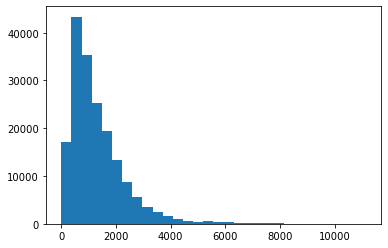

In [42]:
# Now that I know there are zero values I can drop them and look at how the data is distributed
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.SMOCP>0].SMOCP,bins=30);

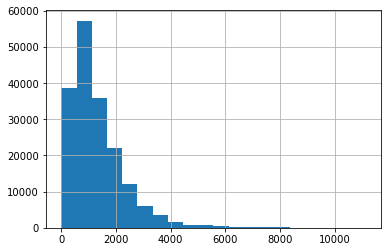

In [43]:
df1_numeric_dropepd_columns.SMOCP.hist(bins=20)

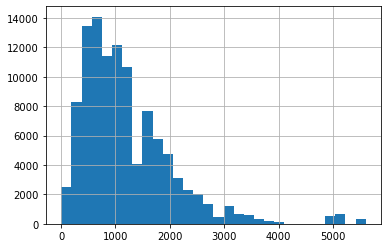

In [44]:
df1_numeric_dropepd_columns.MRGP.hist(bins=30)

In [45]:
df1_numeric_dropepd_columns.MRGP.value_counts()

1200.0    5906
1100.0    5174
1300.0    4785
1500.0    4332
1000.0    4076
1400.0    4062
1600.0    3323
1800.0    2948
1700.0    2844
2000.0    2636
500.0     2277
600.0     2115
1900.0    2106
800.0     2046
700.0     1817
900.0     1797
400.0     1564
2100.0    1559
2200.0    1535
300.0     1313
2500.0    1282
2300.0    1224
750.0     1136
650.0     1131
2400.0    1065
450.0     1019
850.0      990
550.0      984
350.0      975
3000.0     902
2600.0     769
200.0      768
950.0      765
250.0      694
2800.0     690
5100.0     653
2700.0     644
560.0      629
680.0      625
530.0      619
480.0      613
780.0      603
580.0      601
630.0      596
430.0      587
540.0      578
640.0      558
4900.0     557
730.0      550
620.0      547
670.0      545
980.0      532
740.0      529
860.0      517
380.0      513
720.0      509
470.0      509
570.0      500
590.0      494
420.0      490
330.0      482
440.0      480
820.0      474
830.0      472
460.0      472
880.0      471
660.0     

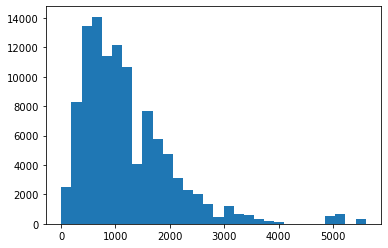

In [46]:
# Now that I know there are zero values I can drop them and look at how the data is distributed
plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.MRGP>0].MRGP,bins=30);

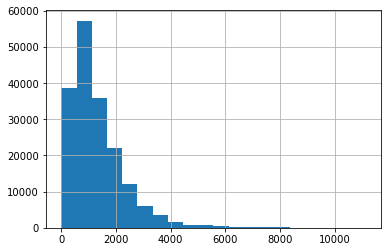

In [47]:
df1_numeric_dropepd_columns.SMOCP.hist(bins=20)

In [48]:
df1_numeric_dropepd_columns.CONP.value_counts()

0.0       165264
200.0        853
250.0        662
300.0        594
180.0        567
220.0        510
150.0        508
190.0        488
230.0        482
240.0        443
210.0        424
170.0        409
160.0        401
280.0        399
260.0        390
270.0        388
130.0        356
350.0        336
140.0        334
290.0        318
330.0        308
400.0        289
320.0        276
310.0        258
1300.0       242
340.0        234
120.0        224
100.0        200
380.0        200
370.0        179
360.0        176
390.0        163
500.0        161
1200.0       155
450.0        152
110.0        138
430.0        138
600.0        125
420.0        111
480.0        107
550.0        105
440.0        104
410.0         98
700.0         83
80.0          82
490.0         77
800.0         71
540.0         66
530.0         65
40.0          63
470.0         61
900.0         61
650.0         61
90.0          60
460.0         58
1000.0        57
580.0         55
50.0          54
60.0          

In [49]:
#checking out the median of this column to see how this median would fit in with the data and see if this aligns at all.
connp_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.CONP>0]
conn_meadian=connp_meadian.CONP.median()

In [50]:
conn_meadian

260.0

In [51]:
df1_numeric_dropepd_columns.CONP.replace(np.nan,conn_meadian,inplace=True)

C:\Users\jstep\anaconda3\envs\Capstone\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [52]:
#ensuring the CONP nan value are replaced
df1_numeric_dropepd_columns

,HINCP_x,SMOCP,PUMA,NP,BDSP,CONP,INSP,MRGP,RMSP,VALP,TAXAMT
0,47900.0,NaN,3108,4,3.0,260.0,NaN,NaN,6.0,NaN,NaN
1,36100.0,691.0,2501,2,3.0,0.0,600.0,330.0,6.0,35000.0,525.0
2,100000.0,NaN,3502,1,0.0,260.0,NaN,NaN,1.0,NaN,NaN
3,45000.0,NaN,3526,2,2.0,260.0,NaN,NaN,5.0,NaN,NaN
6,88000.0,603.0,1204,3,2.0,0.0,20.0,420.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...
293826,30000.0,1366.0,3208,1,4.0,0.0,0.0,670.0,11.0,150000.0,6500.0
293828,150000.0,2603.0,3208,4,4.0,0.0,1200.0,2200.0,8.0,275000.0,10500.0
293829,85000.0,751.0,2601,2,3.0,0.0,550.0,NaN,6.0,145000.0,5750.0
293830,117500.0,1168.0,3407,2,4.0,0.0,990.0,NaN,10.0,500000.0,11500.0


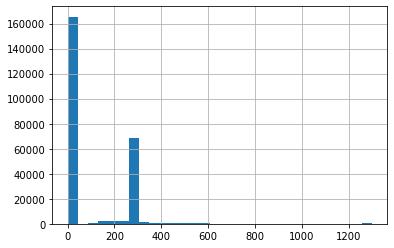

In [53]:
# Checking out the distribution after imputing
df1_numeric_dropepd_columns.CONP.hist(bins=30)

In [54]:
#decided to drop the CONP column that data looks to fake I suppose also thats alot of imputing for zeros and nans 
df1_numeric_dropepd_columns_v2=df1_with_with_features[["HINCP_x","SMOCP","PUMA","NP","BDSP","INSP","RMSP","VALP","TAXAMT"]]

In [55]:
df1_numeric_dropepd_columns_v2

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
0,47900.0,NaN,3108,4,3.0,NaN,6.0,NaN,NaN
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0
2,100000.0,NaN,3502,1,0.0,NaN,1.0,NaN,NaN
3,45000.0,NaN,3526,2,2.0,NaN,5.0,NaN,NaN
6,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...
293826,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0
293828,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0
293829,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0
293830,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0


In [56]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
new_df=pd.DataFrame(imputer.fit_transform(df1_numeric_dropepd_columns_v2))

In [57]:
new_df.columns= df1_numeric_dropepd_columns_v2.columns

In [58]:
new_df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
0,47900.0,1325.2,3108.0,4.0,3.0,954.0,6.0,163000.0,3550.0
1,36100.0,691.0,2501.0,2.0,3.0,600.0,6.0,35000.0,525.0
2,100000.0,1468.6,3502.0,1.0,0.0,328.8,1.0,249000.0,3780.0
3,45000.0,807.4,3526.0,2.0,2.0,982.0,5.0,171000.0,2750.0
4,88000.0,603.0,1204.0,3.0,2.0,20.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208.0,1.0,4.0,0.0,11.0,150000.0,6500.0
246498,150000.0,2603.0,3208.0,4.0,4.0,1200.0,8.0,275000.0,10500.0
246499,85000.0,751.0,2601.0,2.0,3.0,550.0,6.0,145000.0,5750.0
246500,117500.0,1168.0,3407.0,2.0,4.0,990.0,10.0,500000.0,11500.0


In [59]:
# #imputing data for the TAXAMT columun
# tax_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.TAXAMT>0]
# taxx_meadian=tax_meadian.TAXAMT.median()
# df1_numeric_dropepd_columns_v2.TAXAMT.replace(np.nan,taxx_meadian,inplace=True)
# taxx_meadian

In [60]:
# #imputing data for the VALP columun
# val_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.VALP>0]
# vall_meadian=val_meadian.VALP.median()
# df1_numeric_dropepd_columns_v2.VALP.replace(np.nan,vall_meadian,inplace=True)
# vall_meadian

In [61]:
# #imputing data for the INSP columun
# insp_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.INSP>0]
# inspp_meadian=insp_meadian.INSP.median()
# df1_numeric_dropepd_columns_v2.INSP.replace(np.nan,inspp_meadian,inplace=True)
# inspp_meadian


In [62]:
# #imputing data for the SMOCP columun
# smocp_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.SMOCP>0]
# smocpp_meadian=smocp_meadian.SMOCP.median()
# df1_numeric_dropepd_columns_v2.SMOCP.replace(np.nan,smocpp_meadian,inplace=True)
# smocpp_meadian


In [63]:
# Finally have the numeric data frame imputed next is the categorical data
# df1_numeric_dropepd_columns_v2

In [64]:
# df1_numeric_dropepd_columns_v2.info()

In [65]:
df1_with_with_features

,HINCP_x,PUMA,NP,ACR,BDSP,BUS,CONP,FS,INSP,MRGP,MRGI,RMSP,RNTP,SMP,TOIL,VALP,VEH,YBL,TAXAMT,SVAL,SMOCP,WIF
0,47900.0,3108,4,1.0,3.0,2.0,NaN,1.0,NaN,NaN,NaN,6.0,1000.0,NaN,1.0,NaN,3.0,5.0,NaN,0.0,NaN,2.0
1,36100.0,2501,2,1.0,3.0,2.0,0.0,2.0,600.0,330.0,2.0,6.0,NaN,NaN,1.0,35000.0,3.0,1.0,525.0,1.0,691.0,0.0
2,100000.0,3502,1,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1000.0,NaN,1.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN
3,45000.0,3526,2,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,5.0,750.0,NaN,1.0,NaN,1.0,6.0,NaN,0.0,NaN,NaN
6,88000.0,1204,3,1.0,2.0,2.0,0.0,2.0,20.0,420.0,1.0,4.0,NaN,NaN,1.0,140.0,2.0,1.0,525.0,1.0,603.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293826,30000.0,3208,1,1.0,4.0,9.0,0.0,2.0,0.0,670.0,2.0,11.0,NaN,NaN,9.0,150000.0,2.0,4.0,6500.0,1.0,1366.0,NaN
293828,150000.0,3208,4,1.0,4.0,9.0,0.0,2.0,1200.0,2200.0,1.0,8.0,NaN,NaN,9.0,275000.0,2.0,7.0,10500.0,1.0,2603.0,1.0
293829,85000.0,2601,2,1.0,3.0,9.0,0.0,2.0,550.0,NaN,NaN,6.0,NaN,NaN,9.0,145000.0,2.0,3.0,5750.0,1.0,751.0,1.0
293830,117500.0,3407,2,1.0,4.0,9.0,0.0,2.0,990.0,NaN,NaN,10.0,NaN,NaN,9.0,500000.0,2.0,3.0,11500.0,1.0,1168.0,1.0


Taking two apporches to this categorical imputing the first is assinign na values to unknown the secound is to impute the missing values with the most common
df1_categorical_columns_v1=using unknown for NA values 
df_most_common_categorical= using most common for unknown values

In [66]:
df1_categorical_columns_v2=df1_with_with_features[["HINCP_x","ACR","BUS","FS","TOIL","VEH","YBL"]]

In [67]:
df1_categorical_columns_v1=df1_with_with_features[["HINCP_x","ACR","BUS","FS","TOIL","VEH","YBL"]]

In [68]:
df1_categorical_columns_v1

,HINCP_x,ACR,BUS,FS,TOIL,VEH,YBL
0,47900.0,1.0,2.0,1.0,1.0,3.0,5.0
1,36100.0,1.0,2.0,2.0,1.0,3.0,1.0
2,100000.0,NaN,NaN,2.0,1.0,1.0,1.0
3,45000.0,NaN,NaN,2.0,1.0,1.0,6.0
6,88000.0,1.0,2.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
293826,30000.0,1.0,9.0,2.0,9.0,2.0,4.0
293828,150000.0,1.0,9.0,2.0,9.0,2.0,7.0
293829,85000.0,1.0,9.0,2.0,9.0,2.0,3.0
293830,117500.0,1.0,9.0,2.0,9.0,2.0,3.0


In [69]:
df1_categorical_columns_v2

,HINCP_x,ACR,BUS,FS,TOIL,VEH,YBL
0,47900.0,1.0,2.0,1.0,1.0,3.0,5.0
1,36100.0,1.0,2.0,2.0,1.0,3.0,1.0
2,100000.0,NaN,NaN,2.0,1.0,1.0,1.0
3,45000.0,NaN,NaN,2.0,1.0,1.0,6.0
6,88000.0,1.0,2.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
293826,30000.0,1.0,9.0,2.0,9.0,2.0,4.0
293828,150000.0,1.0,9.0,2.0,9.0,2.0,7.0
293829,85000.0,1.0,9.0,2.0,9.0,2.0,3.0
293830,117500.0,1.0,9.0,2.0,9.0,2.0,3.0


In [70]:
cat_imputer=KNNImputer(n_neighbors=5)
new_cat_df=pd.DataFrame(cat_imputer.fit_transform(df1_categorical_columns_v2))

In [71]:
new_cat_df.columns= df1_categorical_columns_v2.columns

In [72]:
new_cat_df

,HINCP_x,ACR,BUS,FS,TOIL,VEH,YBL
0,47900.0,1.0,2.0,1.0,1.0,3.0,5.0
1,36100.0,1.0,2.0,2.0,1.0,3.0,1.0
2,100000.0,1.0,2.0,2.0,1.0,1.0,1.0
3,45000.0,1.2,2.0,2.0,1.0,1.0,6.0
4,88000.0,1.0,2.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
246497,30000.0,1.0,9.0,2.0,9.0,2.0,4.0
246498,150000.0,1.0,9.0,2.0,9.0,2.0,7.0
246499,85000.0,1.0,9.0,2.0,9.0,2.0,3.0
246500,117500.0,1.0,9.0,2.0,9.0,2.0,3.0


In [73]:
df1_categorical_columns_v1.isna().sum()

HINCP_x        0
ACR        60065
BUS        60065
FS             0
TOIL           0
VEH            0
YBL            0
dtype: int64

Only 2 columns with NA values and and they are only 60k so not to bad.

In [74]:
df_most_common_categorical=df1_categorical_columns_v2

In [75]:
#making a dataframe for nan to be filled with unknown
df1_categorical_columns_v1[["ACR","BUS"]] = df1_categorical_columns_v1[["ACR","BUS"]].fillna("Unknown")

C:\Users\jstep\anaconda3\envs\Capstone\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
#fill in nan values with most common value
df_most_common_categorical[["ACR","BUS"]]=df1_categorical_columns_v2[["ACR","BUS"]].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [77]:
df1_categorical_columns_v1

,HINCP_x,ACR,BUS,FS,TOIL,VEH,YBL
0,47900.0,1,2,1.0,1.0,3.0,5.0
1,36100.0,1,2,2.0,1.0,3.0,1.0
2,100000.0,Unknown,Unknown,2.0,1.0,1.0,1.0
3,45000.0,Unknown,Unknown,2.0,1.0,1.0,6.0
6,88000.0,1,2,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
293826,30000.0,1,9,2.0,9.0,2.0,4.0
293828,150000.0,1,9,2.0,9.0,2.0,7.0
293829,85000.0,1,9,2.0,9.0,2.0,3.0
293830,117500.0,1,9,2.0,9.0,2.0,3.0


In [78]:
df_most_common_categorical

,HINCP_x,ACR,BUS,FS,TOIL,VEH,YBL
0,47900.0,1.0,2.0,1.0,1.0,3.0,5.0
1,36100.0,1.0,2.0,2.0,1.0,3.0,1.0
2,100000.0,1.0,9.0,2.0,1.0,1.0,1.0
3,45000.0,1.0,9.0,2.0,1.0,1.0,6.0
6,88000.0,1.0,2.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
293826,30000.0,1.0,9.0,2.0,9.0,2.0,4.0
293828,150000.0,1.0,9.0,2.0,9.0,2.0,7.0
293829,85000.0,1.0,9.0,2.0,9.0,2.0,3.0
293830,117500.0,1.0,9.0,2.0,9.0,2.0,3.0


In [79]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

class OneHotEncoder(SklearnOneHotEncoder):
    """(https://towardsdatascience.com/how-to-assign-labels-with-sklearn-one-hot-encoder-e59a5f17df4f)
    """
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns
    
#

In [80]:
encoder=OneHotEncoder()

In [81]:
encoded_catecories=encoder.fit_transform(new_cat_df.drop("HINCP_x",axis=1))

In [82]:
final_df=new_df.merge(encoded_catecories,how="inner",right_index=True,left_index=True)

In [83]:
pd.set_option("display.max_rows",None)


In [ ]:
final_df

In [ ]:
final_df=final_df.drop("PUMA",axis=1)

In [ ]:
final_df

In [ ]:
final_df.info()

# Saving our final filtered dataframe

In [133]:
final_df.to_csv("../../Data/Imputed.csv",index=False)

In [ ]:
# final_df.loc[238940,"PUMA"]

In [ ]:
dfObj = pd.DataFrame(s, columns = 'PUMA', index=238940)
